## Example for Naive Bayes using the Iris Data

First we need the standard import

In [1]:
%matplotlib inline
from pylab import *
from classy import *

Version  1.0.6
Version:  0.0.31


### Load the Data

In [2]:
data=load_excel('data/iris.xls',verbose=True)

iris.data 151 5
150 vectors of length 4
Feature names: 'petal length in cm', 'petal width in cm', 'sepal length in cm', 'sepal width in cm'
Target values given.
Target names: 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'
Mean:  [3.75866667 1.19866667 5.84333333 3.054     ]
Median:  [4.35 1.3  5.8  3.  ]
Stddev:  [1.75852918 0.76061262 0.82530129 0.43214658]


### Look at the data

it's a good idea to look at the data a little bit, know the shapes, etc...

In [3]:
print((data.vectors.shape))
print((data.targets))
print((data.target_names))
print((data.feature_names))

(150, 4)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
['petal length in cm', 'petal width in cm', 'sepal length in cm', 'sepal width in cm']


since you can't plot 4 dimensions, try plotting some 2D subsets

I don't like the automatic placement of the legend, so lets set it manually

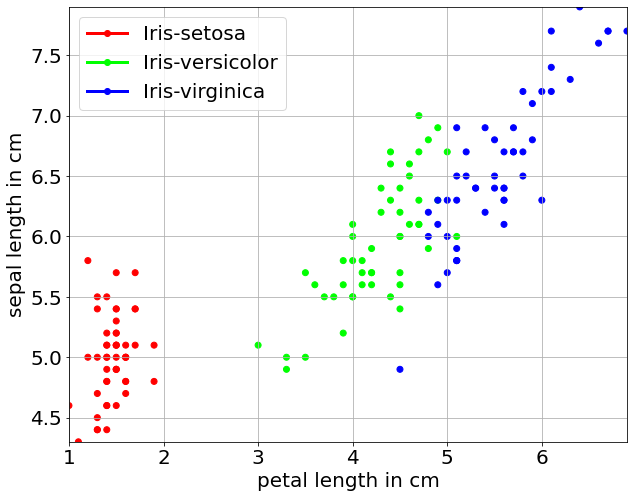

In [4]:
subset=extract_features(data,[0,2])
plot2D(subset,legend_location='upper left')

I don't want to do the classification on this subset, so make sure to use the entire data set.

## Classification

First, we choose a classifier

In [5]:
C=NaiveBayes()

Split the data into test and train subsets...

In [6]:
data_train,data_test=split(data,test_size=0.2)

Original vector shape:  (150, 4)
Train vector shape:  (120, 4)
Test vector shape:  (30, 4)


...and then train...

In [7]:
timeit(reset=True)
C.fit(data_train.vectors,data_train.targets)
print(("Training time: ",timeit()))

Time Reset
('Training time: ', '0.0019621849060058594 seconds ')


In [8]:
print(("On Training Set:",C.percent_correct(data_train.vectors,data_train.targets)))
print(("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets)))

('On Training Set:', 95.83333333333334)
('On Test Set:', 96.66666666666667)


some classifiers have properties that are useful to look at.  Naive Bayes has  *means* and *stddevs*...

In [9]:
C.predict(atleast_2d(array([1,2,3,4])))

array([1])

In [10]:
C.save('test_save_naivebayes.json')

In [11]:
C1=NaiveBayes()

In [12]:
C1.load('test_save_naivebayes.json')

In [14]:
C1.predict(atleast_2d(array([1,2,3,4])))

array([1])

In [15]:
C1.means

array([[1.46052632, 0.25263158, 5.03421053, 3.48684211],
       [4.23255814, 1.31395349, 5.9       , 2.73953488],
       [5.59487179, 2.01794872, 6.64615385, 3.0025641 ]])